In [2]:
# Tensorflow : le package de Deep Learning que nous allons utiliser
import tensorflow as tf

# Gestion des tableaux de données
import numpy as np

# Visualisation
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Création des données avec lesquelles nous allons entraîner le modèle
# N'hésitez pas à changer la fonction
true_function = lambda x: 0.2*x**3 + 0.8*x**2 + 0.3*x + 0.3 + 5*np.sin(x)

X = np.random.uniform(-10, 10, size=100).reshape(-1, 1)
y = true_function(X)
true_y = y.copy()
y[:90] += np.random.randn(90, 1)*5
y[:10] += np.random.randn(10, 1)*100

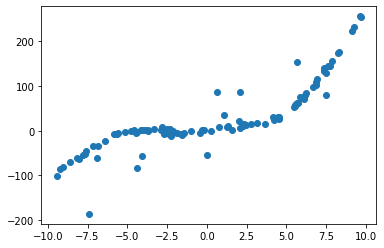

In [4]:
# Visualisation des données
plt.scatter(X, y)

In [11]:
X.shape

(100, 1)

In [32]:
from keras.models import Sequential
from keras.layers import Dense

In [33]:
model = Sequential()

In [38]:
model = tf.keras.models.Sequential({
  tf.keras.layers.Dense(1, input_shape=(100,), activation='sigmoid')})

TypeError: The added layer must be an instance of class Layer. Found: {<tensorflow.python.keras.layers.core.Dense object at 0x1462861f0>}

In [39]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [42]:
model.fit(
  X,
  y,
  shuffle=True,
  epochs=5,
  batch_size=16
)

Epoch 1/5
7/7 [==============================] - 0s 2ms/step - loss: -797.3148 - binary_accuracy: 0.0000e+00
Epoch 2/5
7/7 [==============================] - 0s 4ms/step - loss: -797.3150 - binary_accuracy: 0.0000e+00
Epoch 3/5
7/7 [==============================] - 0s 4ms/step - loss: -797.3150 - binary_accuracy: 0.0000e+00
Epoch 4/5
7/7 [==============================] - 0s 6ms/step - loss: -797.3150 - binary_accuracy: 0.0000e+00
Epoch 5/5
7/7 [==============================] - 0s 4ms/step - loss: -797.3149 - binary_accuracy: 0.0000e+00


In [43]:
# Construction du modèle
model.add((10, 
         activation='relu',
         input_shape=(100,)))


# "Compilation" du modèle: On indique quelle fonction de perte et quel optimisateur utiliser.
model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Entrainement

SyntaxError: invalid syntax (<ipython-input-43-5a6ac8720ed9>, line 3)

Regardons maintenant si le modèle a bien appris.

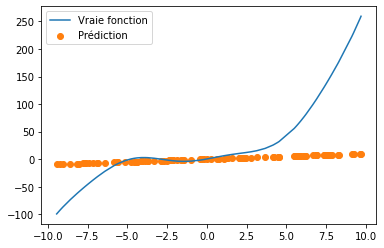

In [44]:
y_pred = model.predict(X)

plt.plot(np.sort(X, 0), true_function(np.sort(X, 0)), label="Vraie fonction")
plt.scatter(X, y_pred, label="Prédiction", c="C1")
plt.legend()